In [1]:
import os
from IPython.display import display
from IPython.display import Image as image2
from PIL import Image
import numpy as np
import cv2
import matplotlib as plt
%matplotlib inline

checking image existence: ['pic_031 (1).jpg', 'pic_055 (1).jpg', 'Download.jpg', 'pic_001.jpg', 'pic_0012.jpg']


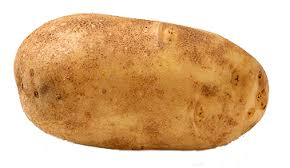

In [2]:
print("checking image existence: %s" % os.listdir('potato')[:5])
display(image2(filename="potato/Download.jpg"))

In [25]:
files_potato = [f for f in os.listdir('potato')]
files_stone = [f for f in os.listdir('rock')]
dirpotato = 'potato/'
dirrock = 'rock/'
targetpot = 'data/train/potato/'
targetrock = 'data/train/rock/'

def build_folder(filenames,directory,targetdir):
    for i in filenames:
            try:
                with Image.open(directory+str(i)) as im:         
                    im = im.resize([64,64], Image.ANTIALIAS)
                    #im = im.convert('L')
                    im.save(targetdir+str(i))
            except:
                print("gnarl")
    print("done deal")

 
build_folder(files_potato,dirpotato,targetpot)
build_folder(files_stone,dirrock,targetrock)

done deal
done deal


checking image existence: ['pic_001.jpg', 'pic_002.jpg', 'pic_003.jpg', 'pic_004.jpg', 'pic_005.jpg', 'pic_006.jpg']


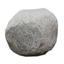

In [26]:
print("checking image existence: %s" % files_stone[:6])
display(image2(filename=targetrock+files_stone[3]))

In [27]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [28]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


In [29]:
# dimensions of our images.
train_data_dir = r'data/train/'
validation_data_dir = r'data/validation/'
nb_train_samples = 180
nb_validation_samples = 180
nb_epoch = 10
img_rows, img_cols = 64,64
img_width, img_height = 64, 64
input_shape = (img_rows, img_cols, 3)
# number of convolutional filters to use
nb_filters = 64
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

In [30]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],border_mode='valid',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_5 (Convolution2D)  (None, 62, 62, 64)    1792        convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 62, 62, 64)    0           convolution2d_5[0][0]            
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 60, 60, 64)    36928       activation_9[0][0]               
____________________________________________________________________________________________________
activation_10 (Activation)       (None, 60, 60, 64)    0           convolution2d_6[0][0]            
___________________________________________________________________________________________

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
metrics=['accuracy'])

In [33]:
#this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

model.save('spudnet.h5')
print("model saved to disk")

Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Epoch 1/10
180/180 [==============================] - 51s - loss: 0.9934 - acc: 0.4944 - val_loss: 0.6397 - val_acc: 0.7111
Epoch 2/10
180/180 [==============================] - 31s - loss: 0.5843 - acc: 0.6778 - val_loss: 0.5907 - val_acc: 0.6944

In [71]:
from keras.models import load_model
model = load_model('spudnet.h5')

In [72]:
img = load_img(targetrock+files_stone[35])  
x = img_to_array(img) 
x = x.reshape((1,) + x.shape) 

In [78]:
img = load_img(targetpot+files_potato[4])  # this is a PIL image
z = img_to_array(img)  
z = z.reshape((1,) + z.shape) 

In [79]:
results = model.predict(x, batch_size=1, verbose=1)
results2 = model.predict(z, batch_size=1, verbose=1)

1/1 [==============================] - 0s


I am 100.00% sure this is a potato


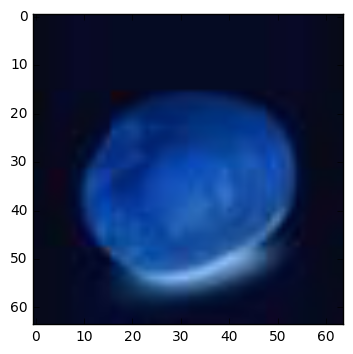

I am 100.00% sure this is a rock


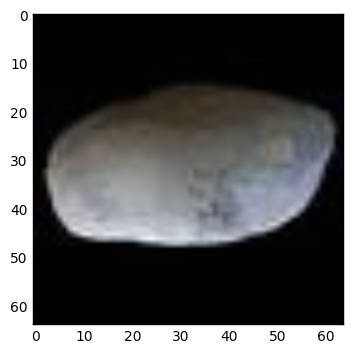

In [80]:
import matplotlib.pyplot as plt
for i in range(0,1):
    if results2[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a rock'.format(results2[i][0]))
    else: 
        print('I am {:.2%} sure this is a potato'.format(1-results2[i][0]))
        
    plt.imshow(z[i])
    plt.show()
    
for i in range(0,1):
    if results[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a rock'.format(results[i][0]))
    else: 
        print('I am {:.2%} sure this is a potato'.format(1-results[i][0]))
        
    plt.imshow(x[i])
    plt.show()